## hw1 - CSCI P556 Assignment 1

# Problem Statement

### The goal of this problem is to estimate the house price based on other features/attributes. Perform data pre-processing before doing the estimation on the housing dataset found in the IU GitHub repository

### **Submitted by: [Vishwas Desai AND visdesai ] [Shilpa Kumari AND shkumari]**

In [325]:
#for Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/housing-data/housing_data.csv


**Importing requied libraries**

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Task 1
## **Loading housing_data.csv from local directory**

In [327]:
#for Kaggle
data = pd.read_csv("../input/housing-data/housing_data.csv")
#from local directory
data = pd.read_csv('C:\\Users\\vishw\\Desktop\\Spring 2021\\Applied ML\\Assignments\\housing_data.csv')
#Display the top few rows
print("Top few rows of the data:")
data.head(4)

Top few rows of the data:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


# Task 2
## Finding continuous valued attributes and categorical attributes

In [328]:
data.info()

data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [329]:
display(data.isnull().sum().sort_values(ascending=True))

date             0
city             0
street           0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
statezip         0
country          0
dtype: int64

### The housing_data.csv dataset has no null values

In [330]:
print('The number of rows and colums are'+str(data.shape))

#print('\nthe columns are - \n')
#print(i,end='\t\n') for i in data.columns.values

The number of rows and colums are(4600, 18)


- ###  The number of data Samples in the dataset is **4600**

- ###  Continuous valued attributes : **13 i.e price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view,	condition, sqft_above, sqft_basement, yr_built,	yr_renovated**

- ###  Categorical attributes: **5 i.e date, street, city, statezip, country**

# Task 3
## **Removing the date, street and country attributes**

In [331]:
data=data.drop(columns=['date', 'street', 'country'])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


- ### We can now see that "street", "date" and "country" attributes have been removed from the datsaet

# Task 4
## Statistical Values and Visualizations

In [332]:
print("Statistical values of the attributes")
data.describe()

Statistical values of the attributes


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## **Visualizing distributions for each attribute**

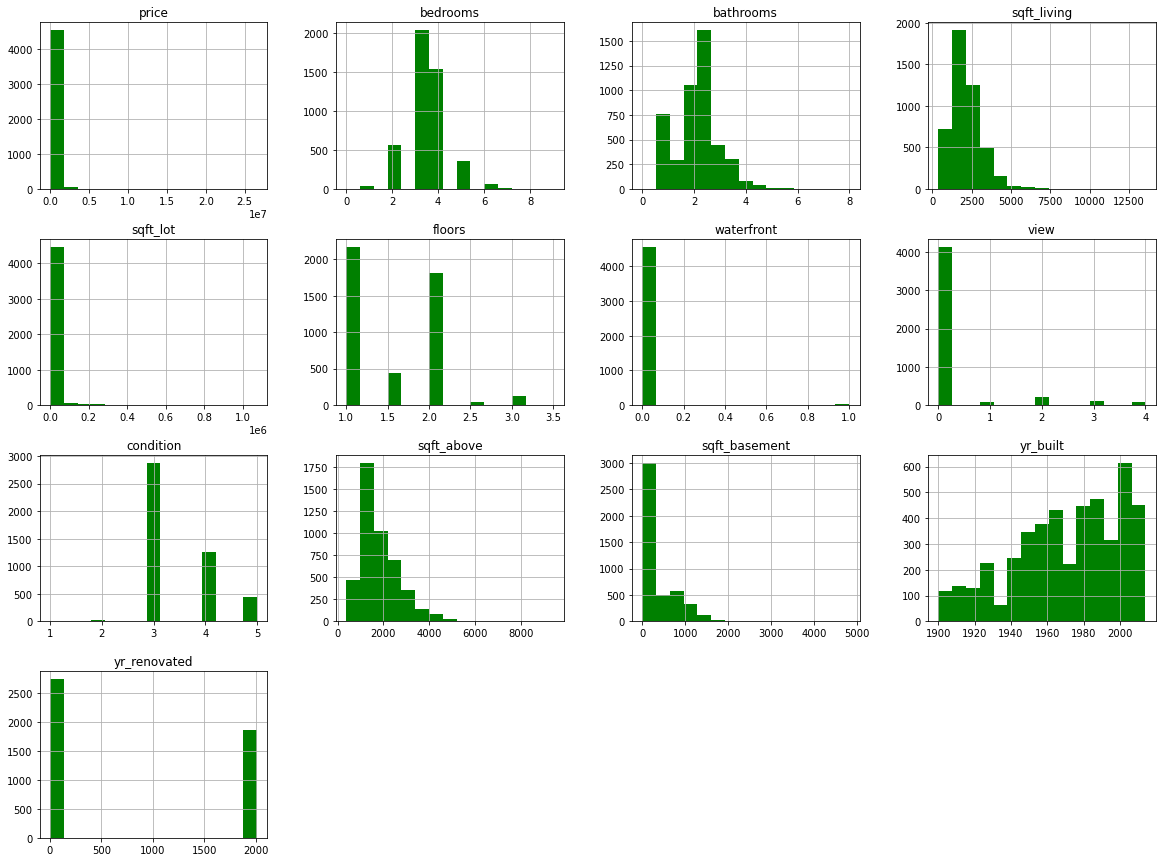

In [333]:
%matplotlib inline 
data.hist(bins=15, figsize=(20,15), color = 'green')
plt.show()

- ## Price



In [334]:
data['price'].describe().to_frame()

,price
count,4.600000e+03
mean,5.519630e+05
std,5.638347e+05
min,0.000000e+00
25%,3.228750e+05
50%,4.609435e+05
75%,6.549625e+05
max,2.659000e+07


In [335]:
data['price'].value_counts().to_frame()

,price
0.0,49
300000.0,42
400000.0,31
450000.0,29
440000.0,29
...,...
334500.0,1
189650.0,1
406500.0,1
833000.0,1


Skew is: 24.790932561757053
Kurtosis is: 1044.3521511267897


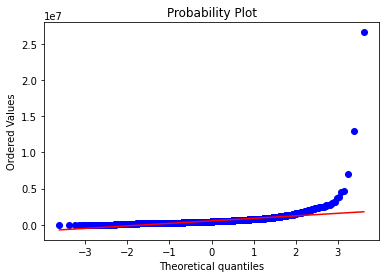

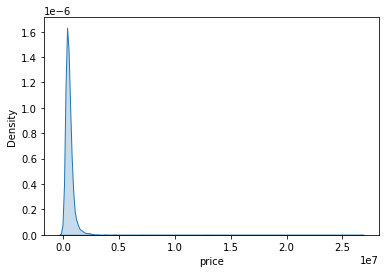

In [336]:
print ("Skew is:", data.price.skew())
print("Kurtosis is:", data.price.kurtosis())

plt.figure()
stats.probplot(x = data['price'], plot =plt)
plt.show()

plt.figure()
sns.kdeplot(data['price'], shade=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


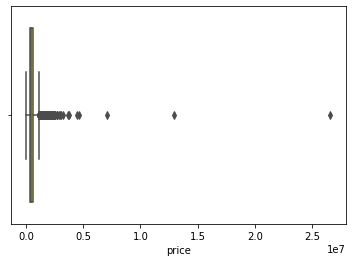

In [337]:
plt.figure()
sns.boxplot(data['price'], color= 'yellow')
plt.show()

## From the above plot we can infer

### - +ve skew in the output indicate as asymmetry in distribution and the tail is larger towards right.

### - Kurtosis of price -kurtosis values higher than 3 are said to be leptokurtic, usually appearing sharp at their peak value

### - Price is deviating from the normal distribution

### - Price shows peakness as described by the Kurtosis value

## Distribution of all attributes

### Bedrooms attribute


In [338]:
data.bedrooms.describe().to_frame()

,bedrooms
count,4600.000000
mean,3.400870
std,0.908848
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,9.000000


In [339]:
data.bedrooms.value_counts().sort_values()

9.0       1
0.0       2
8.0       2
7.0      14
1.0      38
6.0      61
5.0     353
2.0     566
4.0    1531
3.0    2032
Name: bedrooms, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


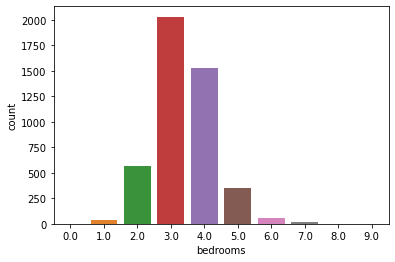

In [340]:
sns.countplot(data['bedrooms'])
plt.show()

### Form the above plot we can infer that around 3500 houses in the dataset have 3 or 4 bedrooms

In [341]:
data.groupby('bedrooms').price.mean().to_frame().reset_index()

,bedrooms,price
0,0.0,1.195324e+06
1,1.0,2.740763e+05
2,2.0,3.916219e+05
3,3.0,4.886130e+05
4,4.0,6.351194e+05
5,5.0,7.701860e+05
6,6.0,8.173628e+05
7,7.0,1.049429e+06
8,8.0,1.155000e+06
9,9.0,5.999990e+05


### - Houses with 0 bedrooms or Houses >8 bedrooms have higher mean price and hence are the outliers for 'bedrooms'

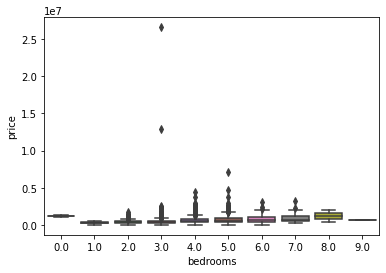

In [342]:
sns.boxplot(x='bedrooms',y='price',data=data)
plt.show()

### Bathrooms

In [343]:
data.bathrooms.describe().to_frame()

,bathrooms
count,4600.000000
mean,2.160815
std,0.783781
min,0.000000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


In [344]:
data.bathrooms.value_counts().sort_values().to_frame()

,bathrooms
8.00,1
6.75,1
6.50,1
5.75,1
0.00,2
6.25,2
1.25,3
5.25,4
5.50,4
5.00,6


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


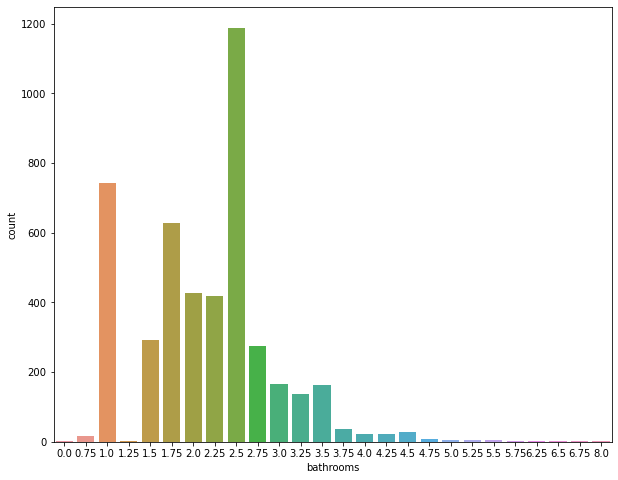

In [345]:
plt.figure(figsize=(10,8))
sns.countplot(data['bathrooms'])
plt.show()

### Outliers for bathroom include houses with >6 bathrooms

### sqft_living

In [346]:
data.sqft_living.describe().to_frame()

,sqft_living
count,4600.000000
mean,2139.346957
std,963.206916
min,370.000000
25%,1460.000000
50%,1980.000000
75%,2620.000000
max,13540.000000


#### Average area of living is 2139 sqft

In [347]:
data.sqft_living.value_counts().sort_values().to_frame()

,sqft_living
4070,1
6390,1
6430,1
6490,1
2432,1
...,...
2000,30
1840,31
1660,31
1720,32


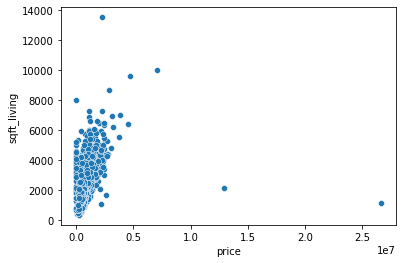

In [348]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='price',y='sqft_living',data=data)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


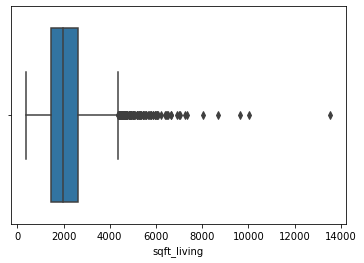

In [349]:
sns.boxplot(data['sqft_living'])
plt.show()

### From above plot, it is clear that the houses whose area is less have less price as compared to the ones which have more area. Houses with bigger square feet are only few and act as outliers

### sqft_lot

In [350]:
data.sqft_lot.describe().to_frame()

,sqft_lot
count,4.600000e+03
mean,1.485252e+04
std,3.588444e+04
min,6.380000e+02
25%,5.000750e+03
50%,7.683000e+03
75%,1.100125e+04
max,1.074218e+06


In [351]:
data.sqft_lot.value_counts().sort_values().to_frame()

,sqft_lot
14980,1
4522,1
6535,1
10669,1
8624,1
...,...
4800,29
7200,50
4000,54
6000,65


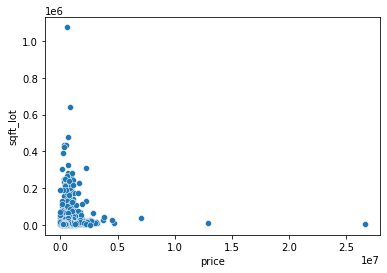

In [352]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='price',y='sqft_lot',data=data)
plt.show()

Comments 

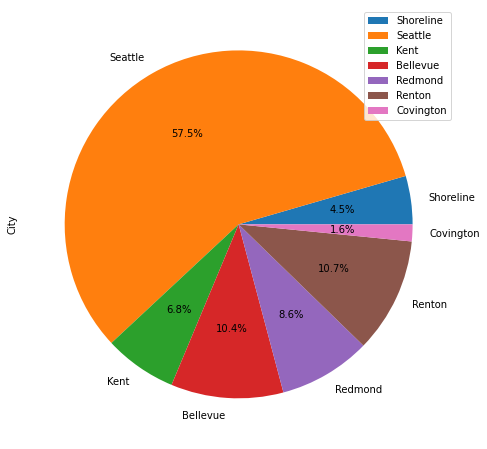

In [353]:
city_count = data['city'].value_counts()
df = pd.DataFrame({'City': city_count}, 
                     index = ['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond', 'Renton', 'Covington']
                   )
#autopct is enabled to show the percentage of houses in each city in the Pie Chart
df.plot.pie(y='City', figsize=(8,8), autopct='%1.1f%%')
plt.show()

# Task 5
## Finding Mean and Median

### Checking fo 0 valued instances for house price

In [354]:
print('Check for 0 values in house price\n')
d = data['price']
# returns True if 0 values exist in the dataframe
d.isin([0]).any().any()
#0 in d.values

Check for 0 values in house price



True

In [355]:
d.describe().to_frame()

,price
count,4.600000e+03
mean,5.519630e+05
std,5.638347e+05
min,0.000000e+00
25%,3.228750e+05
50%,4.609435e+05
75%,6.549625e+05
max,2.659000e+07


### **Filtering the 0 instances from 'price'**

In [356]:
# d-filtered is list of house price with non-zero instances
d_filtered = data[(data['price'] != 0)]
len(d_filtered)

4551

### Number of data samples have reduced from 4600 to 4551 i.e. 49 zero instances have been removed

### **Finding Mean and Median without using built-in functions**

In [357]:
# Finding Mean
def mean(x):
    s = x.sum()
    l = len(x)
    mean = s/l
    return mean

In [358]:
print("Mean House Price:",mean(d_filtered['price']))

Mean House Price: 557905.8991379443


#### Code snippet from [GitHub](https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python)
### Finding Median

In [359]:
# Finding Median
def median(d_filtered):
    q, r = divmod(len(d_filtered), 2)
    if r:
        return sorted(d_filtered)[q]
    return sum(sorted(d_filtered)[q - 1:q + 1]) / 2

In [360]:
print("Median House Price:", median(d_filtered['price']))

Median House Price: 465000.0


### Verifying our mean and median implementation

#### 1) Mean

In [361]:
print("Using built-in mean function \n")
m = d_filtered['price'].mean()
print("Mean House Price:", m)
print("\n")
#verification, returns True if both are equal
print(m == mean(d_filtered['price']))

Using built-in mean function 

Mean House Price: 557905.8991379443


True


#### 2) Median

In [362]:
print("Using built-in median function \n")
med = d_filtered['price'].median()
print("Median House Price:", med)

print("\n")
#verification, returns True if both are equal
print(med == median(d_filtered['price']))

Using built-in median function 

Median House Price: 465000.0


True


# Task 6

##  Creating 3 instances of the dataset

### 1) Removing all instances of zero in house price

In [363]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [364]:
# I1 is an instance of house price with non-zero instances
I1 = data[(data['price'] != 0)]    # d= data.price
len(I1['price'])

4551

In [365]:
I1['price'].isin([0]).any().any()

False

In [366]:
I1_null = pd.isnull( I1['price'])
print(I1_null)

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: price, Length: 4551, dtype: bool


### 2) That replaces the zero-priced houses with the median price value from the non-zero priced houses, using the median function

In [367]:
#checking original data for 0 values
d.isin([0]).any().any()

True

### Null values exist and now we are replacing the 0 instance values with median value

In [368]:
# I2 is an instance replacing 0 values with the median values
I2 = data.replace(0,  median(d_filtered['price']) )
I2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


In [369]:
I2['price'].describe()

count    4.600000e+03
mean     5.569162e+05
std      5.609987e+05
min      7.800000e+03
25%      3.281589e+05
50%      4.650000e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [370]:
# checking if any 0 values exist
I2.isin([0]).any().any()

False

### 0 values instances have been replaced with median values

### 3) that replaces the zero-priced houses with the mean price value from the non-zero priced houses, using the mean function

In [371]:
#checking original data for 0 values
d.isin([0]).any().any()

True

In [372]:
# I3 is an instance replacing 0 values with the mean values
I3 = data.replace(0,  mean(d_filtered['price']) )
I3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   float64
 7   view           4600 non-null   float64
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   float64
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   float64
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
dtypes: float64(8), int64(5), object(2)
memory usage: 539.2+ KB


In [373]:
I3['price'].describe()

count    4.600000e+03
mean     5.579059e+05
std      5.609176e+05
min      7.800000e+03
25%      3.281589e+05
50%      4.687500e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [374]:
# checking if any 0 values exist
I3.isin([0]).any().any()

False

### 0 values instances have been replaced with mean values

### Histogram for all the instances

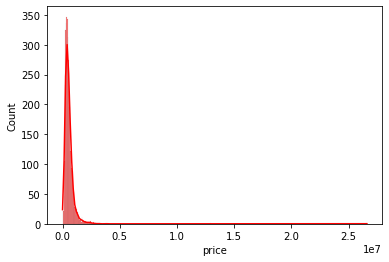

In [375]:
sns.histplot(data['price'], kde=True, element='bars', color='r')
plt.show()

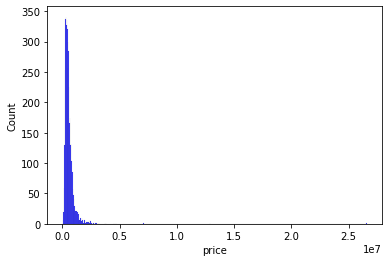

In [376]:
sns.histplot(data=I1['price'], color='b')
plt.show()

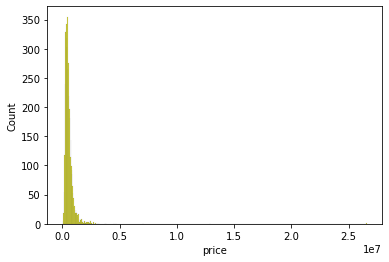

In [377]:
sns.histplot(data=I2['price'], color='y')
plt.show()

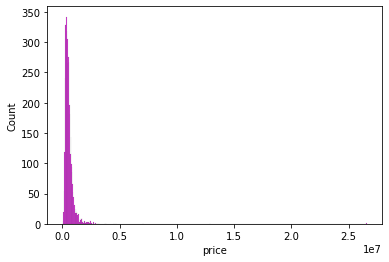

In [378]:
sns.histplot(data=I3['price'], color='m')
plt.show()

### Comments

# Task 7

## Target Dependency for every continuous valued attribute

## For Original Data

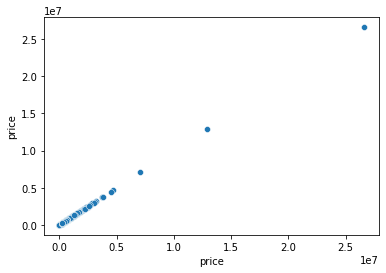

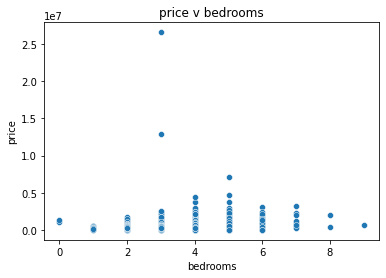

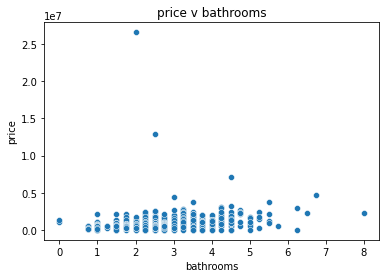

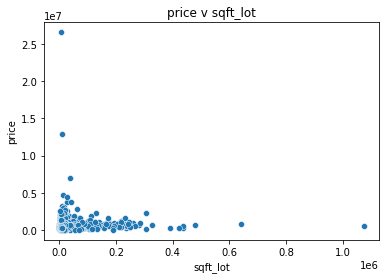

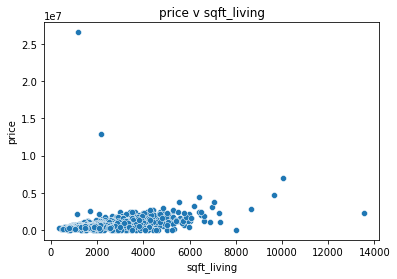

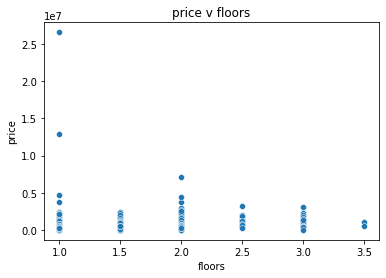

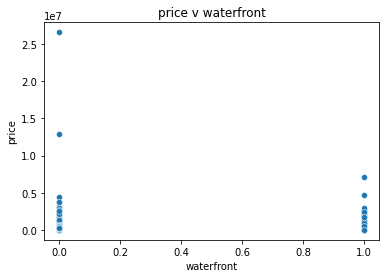

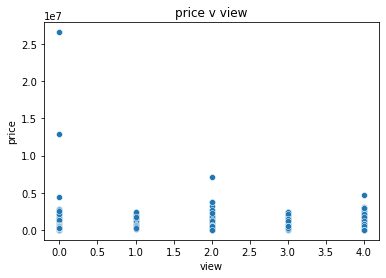

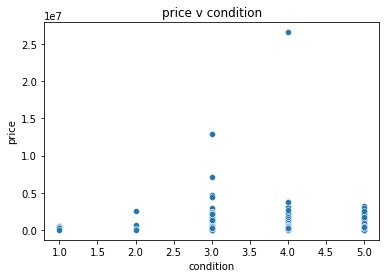

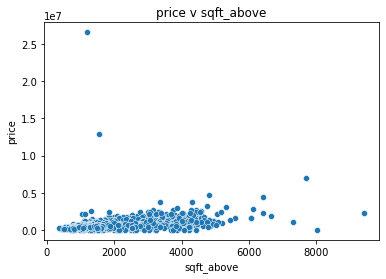

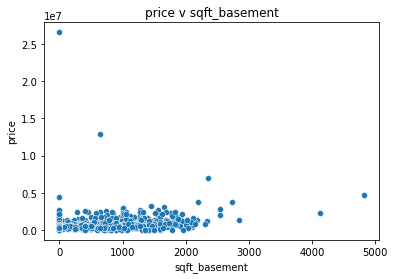

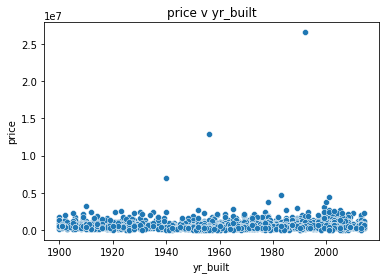

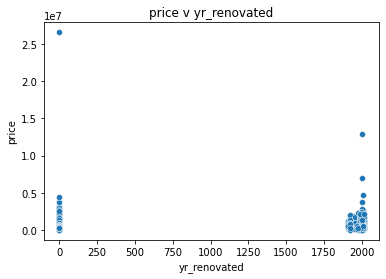

In [379]:
# price
plt.figure(figsize=(6,4))
sns.scatterplot(x='price',y='price',data=data)
plt.show()

#bedrooms
plt.figure(figsize=(6,4))
plt.title("price v bedrooms")
sns.scatterplot(x='bedrooms',y='price',data=data)
plt.show()

#bathrooms
plt.figure(figsize=(6,4))
plt.title("price v bathrooms")
sns.scatterplot(x='bathrooms',y='price',data=data)
plt.show()


#sqft_lot
plt.figure(figsize=(6,4))
plt.title("price v sqft_lot")
sns.scatterplot(x='sqft_lot',y='price',data=data)
plt.show()

#sqft_living
plt.figure(figsize=(6,4))
plt.title("price v sqft_living")
sns.scatterplot(x='sqft_living',y='price',data=data)
plt.show()

#floors 
plt.figure(figsize=(6,4))
plt.title("price v floors")
sns.scatterplot(x='floors',y='price',data=data)
plt.show()

#waterfront       
plt.figure(figsize=(6,4))
plt.title("price v waterfront")
sns.scatterplot(x='waterfront',y='price',data=data)
plt.show()

#view             
plt.figure(figsize=(6,4))
plt.title("price v view")
sns.scatterplot(x='view',y='price',data=data)
plt.show()

#condition
plt.figure(figsize=(6,4))
plt.title("price v condition")
sns.scatterplot(x='condition',y='price',data=data)
plt.show()


#sqft_above       
plt.figure(figsize=(6,4))
plt.title("price v sqft_above")
sns.scatterplot(x='sqft_above',y='price',data=data)
plt.show()

#sqft_basement 
plt.figure(figsize=(6,4))
plt.title("price v sqft_basement")
sns.scatterplot(x='sqft_basement',y='price',data=data)
plt.show()

#yr_built 
plt.figure(figsize=(6,4))
plt.title("price v yr_built")
sns.scatterplot(x='yr_built',y='price',data=data)
plt.show()

#yr_renovated
plt.figure(figsize=(6,4))
plt.title("price v yr_renovated")
sns.scatterplot(x='yr_renovated',y='price',data=data)
plt.show()

## For Instance 1 dataset

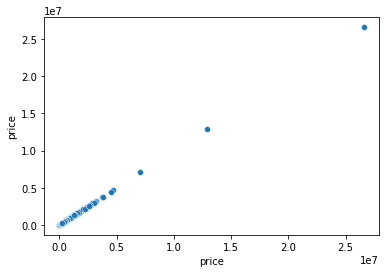

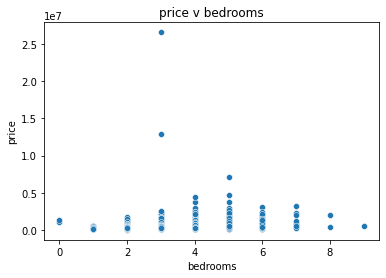

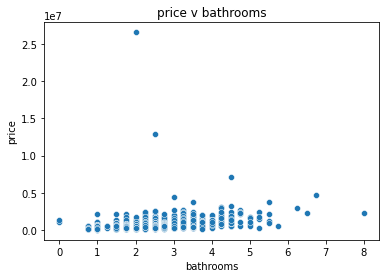

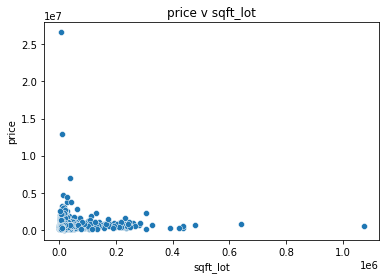

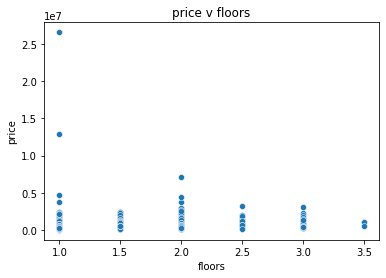

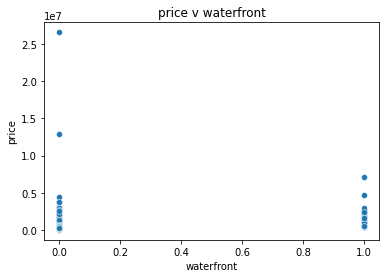

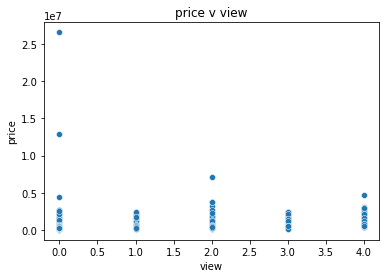

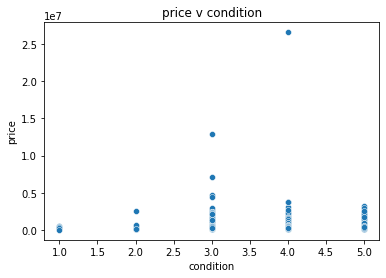

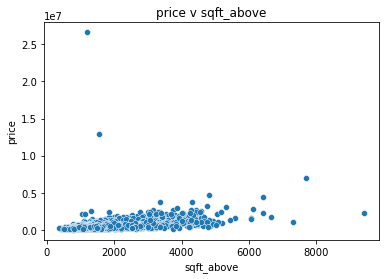

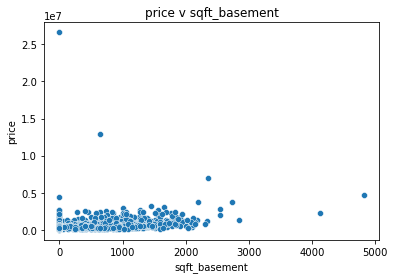

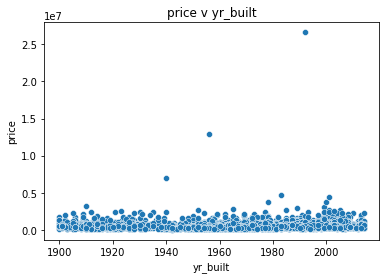

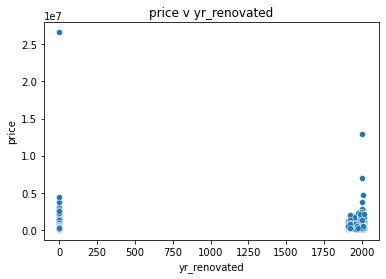

In [380]:
# price
plt.figure(figsize=(6,4))
sns.scatterplot(x='price',y='price',data=I1)
plt.show()

#bedrooms
plt.figure(figsize=(6,4))
plt.title("price v bedrooms")
sns.scatterplot(x='bedrooms',y='price',data=I1)
plt.show()

#bathrooms
plt.figure(figsize=(6,4))
plt.title("price v bathrooms")
sns.scatterplot(x='bathrooms',y='price',data=I1)
plt.show()


#sqft_lot
plt.figure(figsize=(6,4))
plt.title("price v sqft_lot")
sns.scatterplot(x='sqft_lot',y='price',data=I1)
plt.show()

#floors 
plt.figure(figsize=(6,4))
plt.title("price v floors")
sns.scatterplot(x='floors',y='price',data=I1)
plt.show()

#waterfront       
plt.figure(figsize=(6,4))
plt.title("price v waterfront")
sns.scatterplot(x='waterfront',y='price',data=I1)
plt.show()

#view             
plt.figure(figsize=(6,4))
plt.title("price v view")
sns.scatterplot(x='view',y='price',data=I1)
plt.show()

#condition
plt.figure(figsize=(6,4))
plt.title("price v condition")
sns.scatterplot(x='condition',y='price',data=I1)
plt.show()


#sqft_above       
plt.figure(figsize=(6,4))
plt.title("price v sqft_above")
sns.scatterplot(x='sqft_above',y='price',data=I1)
plt.show()

#sqft_basement 
plt.figure(figsize=(6,4))
plt.title("price v sqft_basement")
sns.scatterplot(x='sqft_basement',y='price',data=I1)
plt.show()

#yr_built 
plt.figure(figsize=(6,4))
plt.title("price v yr_built")
sns.scatterplot(x='yr_built',y='price',data=I1)
plt.show()

#yr_renovated
plt.figure(figsize=(6,4))
plt.title("price v yr_renovated")
sns.scatterplot(x='yr_renovated',y='price',data=I1)
plt.show()

## For Instance 2 dataset

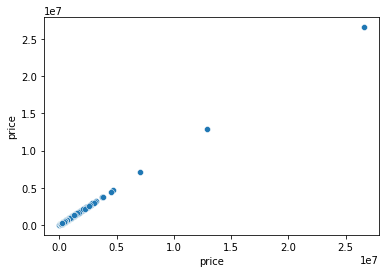

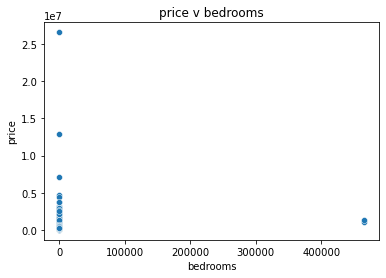

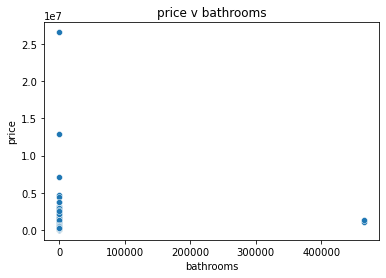

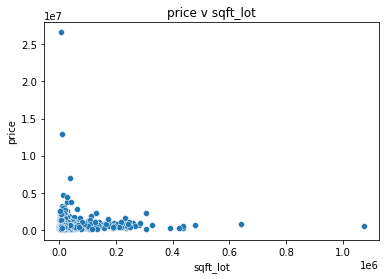

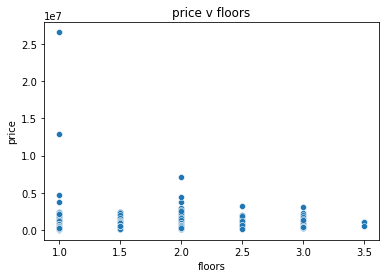

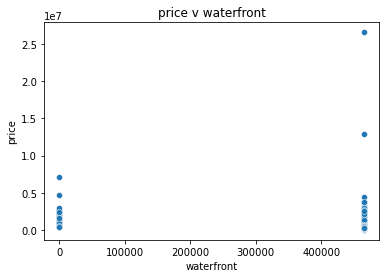

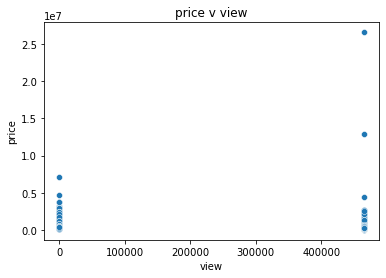

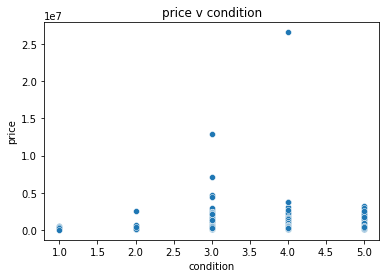

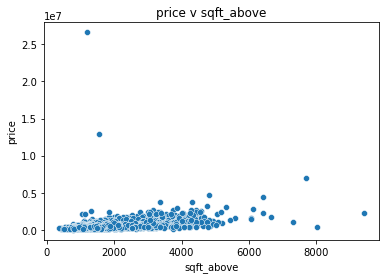

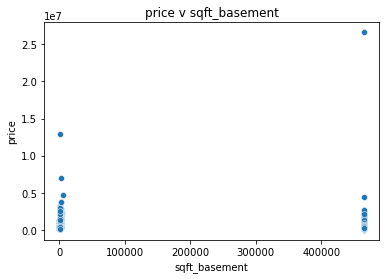

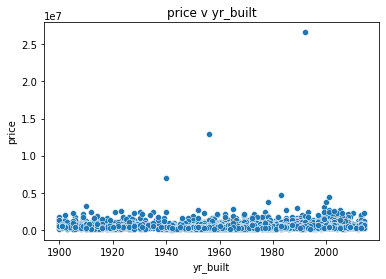

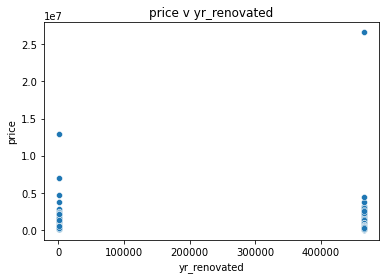

In [381]:
# price
plt.figure(figsize=(6,4))
sns.scatterplot(x='price',y='price',data=I2)
plt.show()

#bedrooms
plt.figure(figsize=(6,4))
plt.title("price v bedrooms")
sns.scatterplot(x='bedrooms',y='price',data=I2)
plt.show()

#bathrooms
plt.figure(figsize=(6,4))
plt.title("price v bathrooms")
sns.scatterplot(x='bathrooms',y='price',data=I2)
plt.show()


#sqft_lot
plt.figure(figsize=(6,4))
plt.title("price v sqft_lot")
sns.scatterplot(x='sqft_lot',y='price',data=I2)
plt.show()

#floors 
plt.figure(figsize=(6,4))
plt.title("price v floors")
sns.scatterplot(x='floors',y='price',data=I2)
plt.show()

#waterfront       
plt.figure(figsize=(6,4))
plt.title("price v waterfront")
sns.scatterplot(x='waterfront',y='price',data=I2)
plt.show()

#view             
plt.figure(figsize=(6,4))
plt.title("price v view")
sns.scatterplot(x='view',y='price',data=I2)
plt.show()

#condition
plt.figure(figsize=(6,4))
plt.title("price v condition")
sns.scatterplot(x='condition',y='price',data=I2)
plt.show()


#sqft_above       
plt.figure(figsize=(6,4))
plt.title("price v sqft_above")
sns.scatterplot(x='sqft_above',y='price',data=I2)
plt.show()

#sqft_basement 
plt.figure(figsize=(6,4))
plt.title("price v sqft_basement")
sns.scatterplot(x='sqft_basement',y='price',data=I2)
plt.show()

#yr_built 
plt.figure(figsize=(6,4))
plt.title("price v yr_built")
sns.scatterplot(x='yr_built',y='price',data=I2)
plt.show()

#yr_renovated
plt.figure(figsize=(6,4))
plt.title("price v yr_renovated")
sns.scatterplot(x='yr_renovated',y='price',data=I2)
plt.show()

## For Instance 3 Dataset

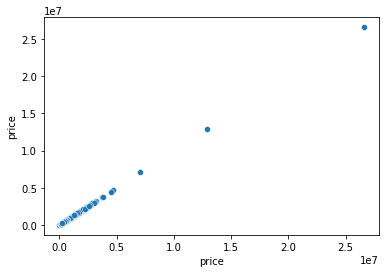

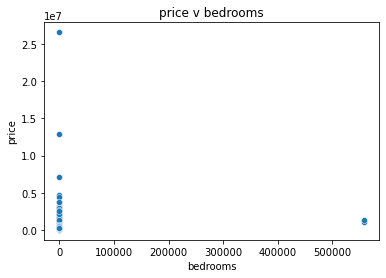

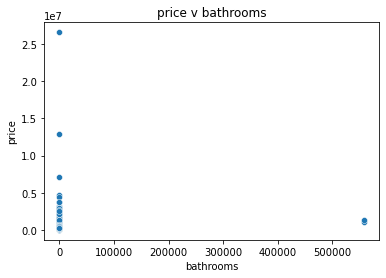

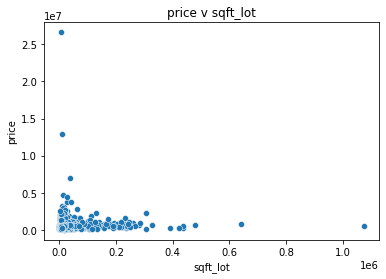

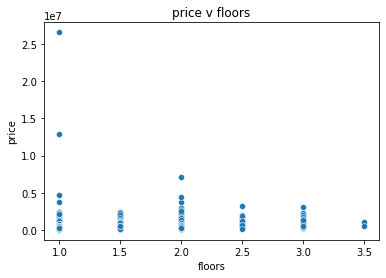

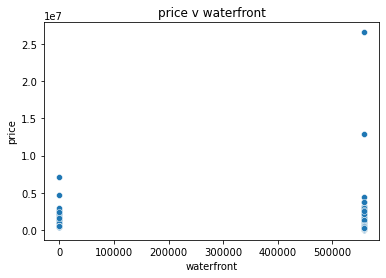

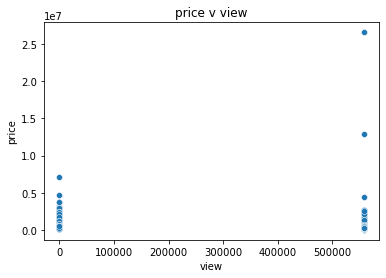

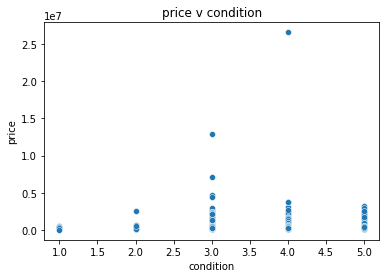

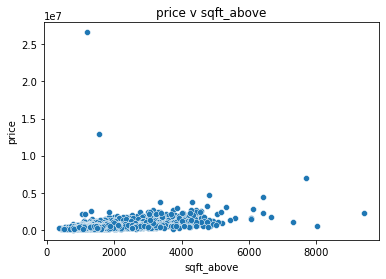

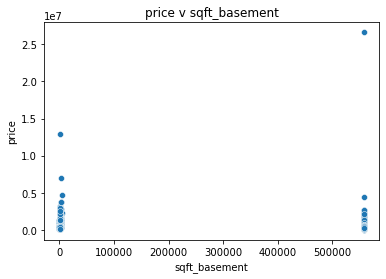

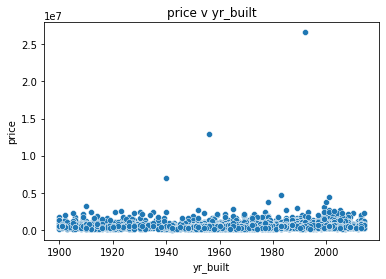

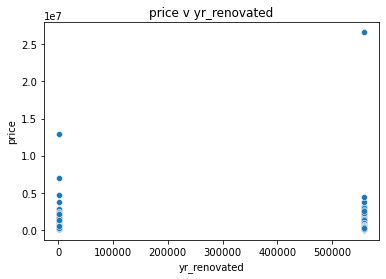

In [382]:
# price
plt.figure(figsize=(6,4))
sns.scatterplot(x='price',y='price',data=I3)
plt.show()

#bedrooms
plt.figure(figsize=(6,4))
plt.title("price v bedrooms")
sns.scatterplot(x='bedrooms',y='price',data=I3)
plt.show()

#bathrooms
plt.figure(figsize=(6,4))
plt.title("price v bathrooms")
sns.scatterplot(x='bathrooms',y='price',data=I3)
plt.show()


#sqft_lot
plt.figure(figsize=(6,4))
plt.title("price v sqft_lot")
sns.scatterplot(x='sqft_lot',y='price',data=I3)
plt.show()

#floors 
plt.figure(figsize=(6,4))
plt.title("price v floors")
sns.scatterplot(x='floors',y='price',data=I3)
plt.show()

#waterfront       
plt.figure(figsize=(6,4))
plt.title("price v waterfront")
sns.scatterplot(x='waterfront',y='price',data=I3)
plt.show()

#view             
plt.figure(figsize=(6,4))
plt.title("price v view")
sns.scatterplot(x='view',y='price',data=I3)
plt.show()

#condition
plt.figure(figsize=(6,4))
plt.title("price v condition")
sns.scatterplot(x='condition',y='price',data=I3)
plt.show()


#sqft_above       
plt.figure(figsize=(6,4))
plt.title("price v sqft_above")
sns.scatterplot(x='sqft_above',y='price',data=I3)
plt.show()

#sqft_basement 
plt.figure(figsize=(6,4))
plt.title("price v sqft_basement")
sns.scatterplot(x='sqft_basement',y='price',data=I3)
plt.show()

#yr_built 
plt.figure(figsize=(6,4))
plt.title("price v yr_built")
sns.scatterplot(x='yr_built',y='price',data=I3)
plt.show()

#yr_renovated
plt.figure(figsize=(6,4))
plt.title("price v yr_renovated")
sns.scatterplot(x='yr_renovated',y='price',data=I3)
plt.show()

**- Sqft_living is more linear with respect to the target than other attributes**

**- sqft_living seems to have a stronger correlation with the target variable**

In [383]:
#data2[data2['price']>1000000]['price'].value_counts().head()

## Task 8


### Pearsons Correlation Coefficient

In [384]:
def corr(target, cva):
    # target is the price and cva is the continuous valued attribute
    # finding mean of target and cva
    mean_t = target.mean() 
    mean_c = cva.mean()
    # standardizing target and cva
    std_t = target.std()
    std_c = cva.std()
    # Pearson's correlation coefficient
    corr = ((target*cva).mean()-mean_t*mean_c)/(std_t*std_c)
    return corr

### For Original Data

**Here we are passing continous numerical attributes to find the correaltion with the target**

In [385]:
var = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built']
for i in var:
    print(i , corr(data.price, data[i]))

bedrooms 0.20029273800841546
bathrooms 0.3270388074359341
sqft_living 0.430316458035794
sqft_lot 0.050440327359515945
floors 0.15142787427579435
waterfront 0.1356188336927328
view 0.2284544979854912
condition 0.034906947209606146
sqft_above 0.36748969516529345
sqft_basement 0.21038082686791798
yr_built 0.0218520789106418


### For Instance 1

#### Instance 1 is without 0 in house price

In [386]:
var = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built','yr_renovated']
for i in var:
    print(i, corr(data.price, I1[i]))

bedrooms 0.24977054122360434
bathrooms 0.37036624855903805
sqft_living 0.46898222811690116
sqft_lot 0.055692559184641194
floors 0.18234728172866677
waterfront 0.15093344091606464
view 0.24580685643405578
condition 0.09273881977862738
sqft_above 0.40311968088231404
sqft_basement 0.2248472515332797
yr_built 0.7197550169039061
yr_renovated -0.020330793777622785


### For Instance 2

In [387]:
var = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built','yr_renovated']
for i in var:
    print(i , corr(data.price, I2[i]))

bedrooms 0.023813979720354667
bathrooms 0.02382157918501167
sqft_living 0.430316458035794
sqft_lot 0.050440327359515945
floors 0.15142787427579435
waterfront -0.13561883369273486
view -0.21960461960034874
condition 0.034906947209606146
sqft_above 0.36748969516529345
sqft_basement -0.1104381065034744
yr_built 0.0218520789106418
yr_renovated 0.028587750466336083


### For Instance 3

In [388]:
var = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built', 'yr_renovated']
for i in var:
    print(i , corr(data.price, I3[i]))

bedrooms 0.023810823938764335
bathrooms 0.02381715789258092
sqft_living 0.430316458035794
sqft_lot 0.050440327359515945
floors 0.15142787427579435
waterfront -0.1356188336932489
view -0.2196046425989241
condition 0.034906947209606146
sqft_above 0.36748969516529345
sqft_basement -0.11047885548023095
yr_built 0.0218520789106418
yr_renovated 0.028587881239055174


### Checking our implementation with built in function

In [389]:
cm = data.corr()
cm["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.430410
sqft_above,0.367570
bathrooms,0.327110
view,0.228504
sqft_basement,0.210427
bedrooms,0.200336
floors,0.151461
waterfront,0.135648
sqft_lot,0.050451


In [390]:
cm = I1.corr()
cm["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.445494
sqft_above,0.380661
bathrooms,0.341126
view,0.242587
sqft_basement,0.217782
bedrooms,0.210228
floors,0.152758
waterfront,0.150083
sqft_lot,0.051347


In [391]:
cm = I2.corr()
cm["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.438525
sqft_above,0.374226
floors,0.152029
sqft_lot,0.051100
condition,0.037982
yr_renovated,0.028689
bathrooms,0.023764
bedrooms,0.023756
yr_built,0.021710


In [392]:
cm = I3.corr()
cm["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.439775
sqft_above,0.375239
floors,0.152011
sqft_lot,0.051186
condition,0.038566
yr_renovated,0.028684
bathrooms,0.023726
bedrooms,0.023719
yr_built,0.021661


### Insights from Pearson's Correlation

- sqft_living seems to have a stronger correaltion with house price amongst ther atttributes
- yr_renovated has a neagtive correlation for original and I1 instances of the dataset
- sqft_basement, waterfront, view have a neagtive correlation for I2 and I3 instances of the dataset
- We find that most of the features show a stronger correlation for Instance 1 i.e. after removing 0 valued instances

### Heatmap for Correlation using seaborn

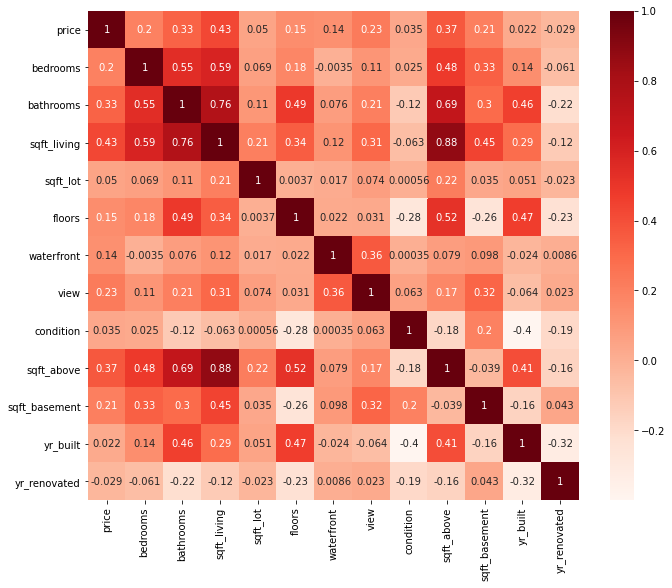

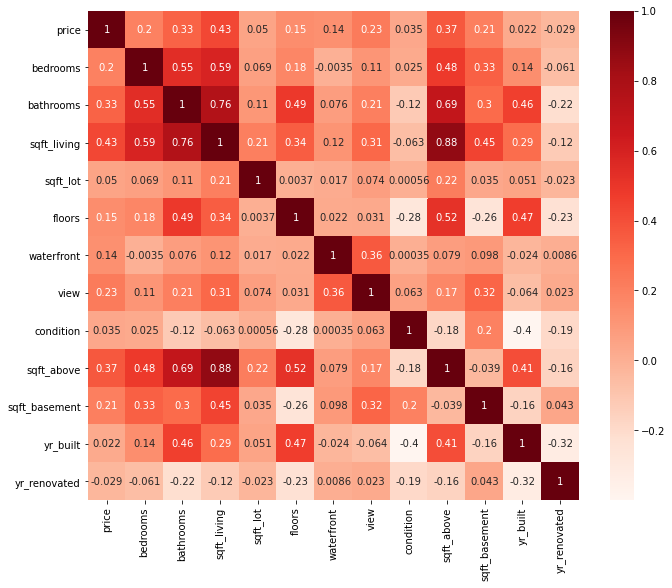

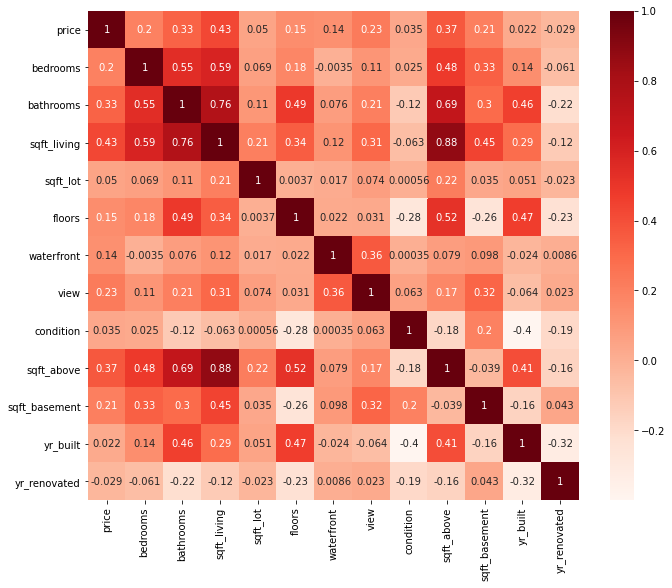

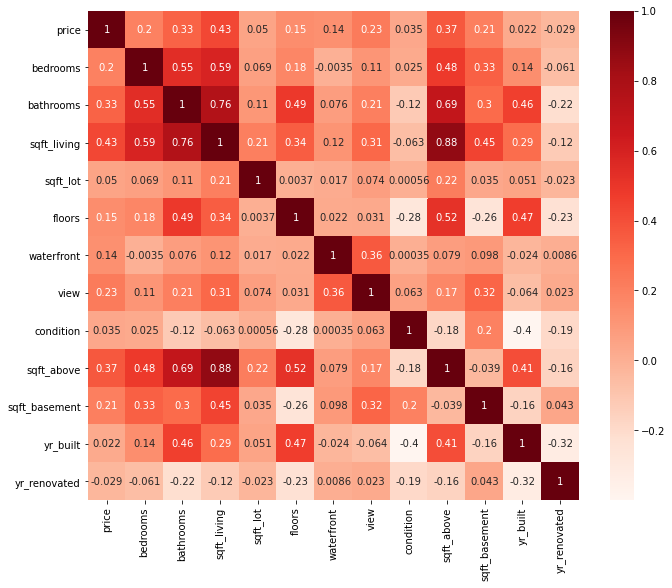

In [393]:
#Original Data
plt.figure(figsize=(11,9))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Instance1
plt.figure(figsize=(11,9))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Instance 2
plt.figure(figsize=(11,9))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Instance 3
plt.figure(figsize=(11,9))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### The correaltion coefficents do agree with our visual inspection of correaltion. We belived that certain attributes like 'condition' has low correaltion with target and as it turns out, it indeed has a very low correlation with price

## Task 9

## **OneHotEncoding**

### For Original Data

In [394]:
data.nunique().sort_values(ascending=True)

waterfront          2
view                5
condition           5
floors              6
bedrooms           10
bathrooms          26
city               44
yr_renovated       60
statezip           77
yr_built          115
sqft_basement     207
sqft_above        511
sqft_living       566
price            1741
sqft_lot         3113
dtype: int64

In [395]:
data.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
statezip          object
dtype: object

Finding Categorical attributes

In [396]:
[i for i in data.columns if data[i].dtype == 'object']

['city', 'statezip']

### - There are 2 attributes which are categorical in nature, 'city', 'statezip'

### Now we will check the rest of the data types which has negligible correlation to target

In [397]:
low_corr= [i for i in data.columns if data[i].nunique() <= 10]
low_corr

['bedrooms', 'floors', 'waterfront', 'view', 'condition']

### Amongst the above attributes, 'condition' which has a correaltion of 0.035 for all instances of the dataset seems like a categorical variable

In [398]:
data['city'].nunique(), data['statezip'].nunique(), 

(44, 77)

In [399]:
ohe_data=pd.get_dummies(data, columns=['city','statezip'], drop_first=True)
ohe_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [400]:
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 132 entries, price to statezip_WA 98354
dtypes: float64(4), int64(9), uint8(119)
memory usage: 1001.9 KB


### For Instance 1 dataset

In [401]:
I1['city'].nunique(), I1['statezip'].nunique()

(44, 77)

In [402]:
ohe_I1=pd.get_dummies(I1,columns=['city','statezip'], drop_first=True)
ohe_I1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [403]:
ohe_I1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Columns: 132 entries, price to statezip_WA 98354
dtypes: float64(4), int64(9), uint8(119)
memory usage: 1.1 MB


### For Instance 2 dataset

In [404]:
I2['city'].nunique(), I2['statezip'].nunique()

(44, 77)

In [405]:
ohe_I2=pd.get_dummies(I2,columns=['city','statezip'], drop_first=True)
ohe_I2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,465000,465000,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,465000,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,465000,465000,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,465000,465000,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,465000,465000,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [406]:
ohe_I2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 132 entries, price to statezip_WA 98354
dtypes: float64(4), int64(9), uint8(119)
memory usage: 1001.9 KB


### For Instance 3 dataset

In [407]:
I3['city'].nunique(), I3['statezip'].nunique()

(44, 77)

In [408]:
ohe_I3=pd.get_dummies(I3,columns=['city','statezip'], drop_first=True)
ohe_I3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,557905.899138,557905.899138,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,557905.899138,4.000000,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,557905.899138,557905.899138,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,557905.899138,557905.899138,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,557905.899138,557905.899138,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [409]:
ohe_I3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 132 entries, price to statezip_WA 98354
dtypes: float64(8), int64(5), uint8(119)
memory usage: 1001.9 KB


## Task 10
## **FEATURE SCALING**

### Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
**General equation MinMax Normalization** <img src="https://miro.medium.com/max/1400/1*GwcC80mDUyscDAWtwZSBdA.png" width="350"/>

### Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
**General equation of Standardization** <img src="https://miro.medium.com/max/1400/1*xIilonr1kVdoQRRvcpc1ng.png" width="350"/>

## Scaling original Data

In [410]:
og_data=data.drop(columns=['city', 'statezip'])
og_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


***Dataset 1 - Normalized original data***

In [411]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(og_data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
og_scaled = pd.DataFrame(scaled,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
og_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975


In [412]:
#og_scaled.mean(), og_scaled.std()

***Dataset 2 - Standardized original data***

In [413]:
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(og_data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
og_scaled_std = pd.DataFrame(scaled_std,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
og_scaled_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352


In [414]:
#og_stdscaled.mean(), og_stdscaled.std()

## Scaling Instance 1 Data

### Instace 1 is all USD 0 house prices removed from the original dataset

In [415]:
I1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


***Dataset 3 - Normalized Instance 1 data (without 0 values instances)***

In [416]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(I1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
I1_scaled = pd.DataFrame(scaled,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
I1_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975


***Dataset 4 - Standardized Instance 1 data (without 0 values instances)***

In [417]:
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(I1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
I1_scaled_std = pd.DataFrame(scaled_std,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
I1_scaled_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,-0.436308,-0.843810,-0.828976,-0.192527,-0.022648,-0.08146,-0.306647,-0.665622,-0.564425,-0.671413
1,1.774869,0.444408,1.587735,-0.160880,0.905905,-0.08146,4.920139,2.296965,1.811625,-0.065270
2,-0.436308,-0.199701,-0.211721,-0.080319,-0.951201,-0.08146,-0.306647,0.815672,0.126151,-0.671413
3,-0.436308,0.122354,-0.138487,-0.189245,-0.951201,-0.08146,-0.306647,0.815672,-0.962384,1.493385
4,0.669281,0.444408,-0.201259,-0.120558,-0.951201,-0.08146,-0.306647,0.815672,-0.798519,1.060425


## Scaling Instance 2 Data

### Instace 2 is all USD 0 house prices replaced with median

In [418]:
I2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,465000,465000,3,1340,465000,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,465000,4,5,3370,280,1921,465000,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,465000,465000,4,1930,465000,1966,465000,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,465000,465000,4,1000,1000,1963,465000,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,465000,465000,4,1140,800,1976,1992,Redmond,WA 98052


***Dataset 5 - Normalized Instance 2 data (replaced with median)***

In [419]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(I2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
I2_scaled = pd.DataFrame(scaled,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
I2_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,0.000004,0.000002,0.073652,0.006775,0.2,1.0,1.000000,0.50,0.107301,1.000000
1,0.000009,0.000004,0.249051,0.007835,0.4,1.0,0.000006,1.00,0.331858,0.000559
2,0.000004,0.000003,0.118451,0.010534,0.0,1.0,1.000000,0.75,0.172566,1.000000
3,0.000004,0.000003,0.123766,0.006885,0.0,1.0,1.000000,0.75,0.069690,0.002108
4,0.000006,0.000004,0.119210,0.009186,0.0,1.0,1.000000,0.75,0.085177,0.001677


***Dataset 6 - Standardized Instance 2 data (replaced with median)***

In [420]:
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(I2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
I2_scaled_std = pd.DataFrame(scaled_std,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
I2_scaled_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,-0.020897,-0.020924,-0.829971,-0.193434,-0.022416,0.085004,0.333333,-0.667112,-0.565224,0.822054
1,-0.020691,-0.020821,1.568528,-0.161718,0.906555,0.085004,-2.999989,2.286416,1.789559,-1.218632
2,-0.020897,-0.020873,-0.217367,-0.080978,-0.951388,0.085004,0.333333,0.809652,0.119171,0.822054
3,-0.020897,-0.020847,-0.144686,-0.190145,-0.951388,0.085004,0.333333,0.809652,-0.959621,-1.215470
4,-0.020794,-0.020821,-0.206984,-0.121306,-0.951388,0.085004,0.333333,0.809652,-0.797222,-1.216348


## Scaling Instance 3 Data

### Instace 3 is all USD 0 house prices replaced with mean

***Dataset 7 - Normalized Instance 3 data (replaced with mean)***

In [421]:
I3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,557905.899138,557905.899138,3,1340,557905.899138,1955,2005.000000,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,557905.899138,4.000000,5,3370,280.000000,1921,557905.899138,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,557905.899138,557905.899138,4,1930,557905.899138,1966,557905.899138,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,557905.899138,557905.899138,4,1000,1000.000000,1963,557905.899138,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,557905.899138,557905.899138,4,1140,800.000000,1976,1992.000000,Redmond,WA 98052


In [422]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(I3[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
I3_scaled = pd.DataFrame(scaled,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
I3_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,0.000004,0.000001,0.073652,0.006775,0.2,1.0,1.000000,0.50,0.107301,1.000000
1,0.000007,0.000003,0.249051,0.007835,0.4,1.0,0.000005,1.00,0.331858,0.000466
2,0.000004,0.000002,0.118451,0.010534,0.0,1.0,1.000000,0.75,0.172566,1.000000
3,0.000004,0.000003,0.123766,0.006885,0.0,1.0,1.000000,0.75,0.069690,0.001757
4,0.000005,0.000003,0.119210,0.009186,0.0,1.0,1.000000,0.75,0.085177,0.001398


***Dataset 8 - Standardized Instance 3 data (replaced with mean)***

In [423]:
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(I3[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']])
I3_scaled_std = pd.DataFrame(scaled_std,columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement'])
I3_scaled_std.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,-0.020891,-0.020913,-0.829971,-0.193434,-0.022416,0.085004,0.333333,-0.667112,-0.565224,0.822054
1,-0.020719,-0.020827,1.568528,-0.161718,0.906555,0.085004,-2.999990,2.286416,1.789559,-1.218270
2,-0.020891,-0.020870,-0.217367,-0.080978,-0.951388,0.085004,0.333333,0.809652,0.119171,0.822054
3,-0.020891,-0.020848,-0.144686,-0.190145,-0.951388,0.085004,0.333333,0.809652,-0.959621,-1.215636
4,-0.020805,-0.020827,-0.206984,-0.121306,-0.951388,0.085004,0.333333,0.809652,-0.797222,-1.216368


## Task 11
## Cross validation using KFold

## KFold Cross Validation for each dataset

### About KFold

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized sub-samples. Of the k sub-samples, a single sub-sample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data.

- The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.
- The k results can then be averaged to produce a single estimation as the overall result of the model.
- The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once and also it does not waste too much data which is a major advantage in problems where the number of samples is very small.


***Dataset 1 - Normalized original data***

In [424]:
d1 = ohe_data.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d1.head()

In [425]:
c1 = pd.concat([d1, og_scaled], axis=1)
#c1.head()
c2=data['price']
ds1 = pd.concat([c1, c2], axis =1)
#ds1.head()

In [426]:
x_norm = ds1.drop('price', axis=1)
y_norm = ds1['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [427]:
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True)
og_scores = np.sqrt(-1*cross_val_score(model, x_norm, y_norm, scoring='neg_mean_squared_error', cv=kf,))
print(og_scores)

[ 266654.67007861  223381.19578086 1371332.50616237  184581.09956477
  205242.8053438   198226.10965149  210897.44554271  223867.82041605
  206717.83051007  220996.11348778]


In [428]:
og_scores.mean(), og_scores.std()

(331189.759653851, 347324.7190103655)

***Dataset 2 - Standardized original data***

In [429]:
d2 = ohe_data.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d2.head()

In [430]:
c3 = pd.concat([d2, og_scaled_std], axis=1)
#c1.head()
c4 = data['price']
ds2 = pd.concat([c3, c4], axis =1)
#ds2.head()

In [431]:
x_std = ds2.drop('price', axis=1)
y_std = ds2['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
kf = KFold(n_splits=10)
og_scores_std = np.sqrt(-1*cross_val_score(model, x_std, y_std, scoring='neg_mean_squared_error', cv=kf))
print(og_scores_std)

[ 161501.37907513  140006.38541771  159887.57333875  181335.1460892
  244677.90771951  187964.49533863  193957.5340555   158243.98724115
  198511.62598446 1421342.58628666]


In [432]:
og_scores_std.mean(), og_scores_std.std()

(304742.8620546692, 373219.64883635845)

***Dataset 3 - Normalized Instance 1 data (without 0 values instances)***

In [433]:
d3 = ohe_I1.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d3.head()
c5 = pd.concat([d3, I1_scaled], axis=1)
#c5.head()
c6 = data['price']
ds3 = pd.concat([c5, c6], axis =1)
#ds3.head()
ds3 = ds3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [434]:
x_norm_I1 = ds3.drop('price', axis = 1)
y_norm_I1 = ds3['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
kf = KFold(n_splits=10)
I1_scores = np.sqrt(-1*cross_val_score(model, x_norm_I1, y_norm_I1, scoring='neg_mean_squared_error', cv=kf,))
print(I1_scores)

[ 162695.37664139  150612.99561839  158817.7700686   180688.41401064
  148803.55496337  248180.24465958  199288.09323621  165387.29634575
  191968.90453826 1398156.95997902]


In [435]:
I1_scores.mean(), I1_scores.std()

(300459.9610061202, 366982.7167801732)

***Dataset 4 - Standardized Instance 1 data (without 0 values instances)***

In [436]:
d4 = ohe_I1.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d3.head()
c7 = pd.concat([d3, I1_scaled_std], axis=1)
#c5.head()
c8 = data['price']
ds4 = pd.concat([c7, c8], axis =1)
#ds4.head()
ds4 = ds4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [437]:
x_std_I1 = ds4.drop('price', axis=1)
y_std_I1 = ds4['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
kf = KFold(n_splits=10)
I1_scores_std = np.sqrt(-1*cross_val_score(model, x_std_I1, y_std_I1, scoring='neg_mean_squared_error', cv=kf,))
print(I1_scores_std)

[ 162695.37664136  150612.99561835  158817.7700686   180688.41401063
  148803.55496337  248180.24465958  199288.09323621  165387.29634572
  191968.90453825 1398156.95997902]


In [438]:
I1_scores_std.mean(), I1_scores_std.std()

(300459.9610061092, 366982.7167801777)

***Dataset 5 - Normalized Instance 2 data (replaced with median)***

In [439]:
d5 = ohe_I2.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d3.head()
e1 = pd.concat([d5, I2_scaled], axis=1)
#c5.head()
e2 = data['price']
ds5 = pd.concat([e1, e2], axis =1)
#ds3.head()

In [440]:
x_norm_I2 = ds5.drop('price', axis=1)
y_norm_I2= ds5['price']
kf = KFold(n_splits=10)
I2_scores =np.sqrt(-1*cross_val_score(model, x_norm_I2, y_norm_I2, scoring='neg_mean_squared_error', cv=kf,))
print(I2_scores)

[ 164334.73029775  140824.66654161  161022.47142564  182889.98015981
  242484.23029959  189450.72050086  195178.27201368  158693.60484144
  197517.81741084 1420360.28299407]


In [441]:
I2_scores.mean(), I2_scores.std()

(305275.6776485293, 372650.921778763)

***Dataset 6 - Standardized Instance 2 data (replaced with median)***

In [442]:
d6 = ohe_I2.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d3.head()
e3 = pd.concat([d5, I2_scaled_std], axis=1)
#c5.head()
e4 = data['price']
ds6 = pd.concat([e3, e4], axis =1)
#ds3.head()

In [443]:
x_std_I2 = ds6.drop('price', axis=1)
y_std_I2 = ds6['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
kf = KFold(n_splits=10)
I2_scores_std = np.sqrt(-1*cross_val_score(model, x_std_I2, y_std_I2, scoring='neg_mean_squared_error', cv=kf,))
print(I2_scores_std)

[ 164334.72970933  140824.66654481  161022.47144897  182889.97905829
  242484.23032715  189450.72053825  195178.27202409  158693.60485943
  197517.81742165 1420360.28297503]


In [444]:
I2_scores_std.mean(), I2_scores_std.std()

(305275.67749070015, 372650.9218274978)

***Dataset 7 - Normalized Instance 3 data (replaced with mean)***

In [445]:
d7 = ohe_I3.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d3.head()
e5 = pd.concat([d5, I3_scaled], axis=1)
#c5.head()
e6 = data['price']
ds7 = pd.concat([e5, e6], axis =1)
#ds3.head()

In [446]:
x_norm_I3 = ds7.drop('price', axis=1)
y_norm_I3 = ds7['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
kf = KFold(n_splits=10)
I3_scores = np.sqrt(-1*cross_val_score(model, x_norm_I3, y_norm_I3, scoring='neg_mean_squared_error', cv=kf,))
print(I3_scores)

[ 164334.72852608  140824.66605308  161022.46993701  182889.97747405
  242484.23075583  189450.71846512  195178.27186496  158693.60376148
  197517.81740513 1420360.28347448]


In [447]:
I3_scores.mean(), I3_scores.std()

(305275.6767717212, 372650.9222595356)

***Dataset 8 - Standardized Instance 3 data (replaced with mean)***

In [448]:
d8 = ohe_I3.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','price'], axis = 1)
#d3.head()
e7 = pd.concat([d5, I3_scaled], axis=1)
#c5.head()
e8 = data['price']
ds8 = pd.concat([e7, e8], axis =1)
#ds3.head()

In [449]:
x_std_I3 = ds8.drop('price', axis=1)
y_std_I3 = ds8['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
kf = KFold(n_splits=10)
I3_scores_std = np.sqrt(-1*cross_val_score(model, x_std_I3, y_std_I3, scoring='neg_mean_squared_error', cv=kf,))
print(I3_scores_std)

[ 164334.72852608  140824.66605308  161022.46993701  182889.97747405
  242484.23075583  189450.71846512  195178.27186496  158693.60376148
  197517.81740513 1420360.28347448]


In [450]:
I3_scores_std.mean(), I3_scores_std.std()

(305275.6767717212, 372650.9222595356)

## Task 12

### Finding Mean Absolute Error(MAE) and Mean Squared Error(MSE) for each fold in all 8 datasets

*Code snippet from [Stack Overflow](https://stackoverflow.com/questions/62303504/why-is-my-mean-absolute-error-mae-from-a-multioutputregressor-method-showing-o)*

In [451]:
# Function to find Mean Absolute Error
def mean_ae(y, predictions_y):
    return np.sqrt(mean_absolute_error(y, predictions_y))

# Function to find Mean Square Error
def mean_se(y, predictions_y):
    return np.sqrt(mean_squared_error(y, predictions_y))


**[Source for Task 12](https://community.dataquest.io/t/kf-split-features/499112)**

**Note:**

**- Dataset 1,3,5,7 are noramlized datasets**

**- Dataset 2,4,6,8 are standardized datasets**


## For Normalized datasets

#### DataSet1, DataSet3, DataSet5, DataSet7 are the normalized datasets 

### Dataset 1 - Normalized original data

In [452]:
#print("For dataset 1, 3, 5, 7")
print("Dataset 1 - Normalized original data \n")
i=0
for train, test in kf.split(ds1):
    fold_train = x_norm.iloc[train]
    fold_test = x_norm.iloc[test]
     #target
    y_fold_train = y_norm.iloc[train]
    y_fold_test = y_norm.iloc[test]
    i+=1
    
    model.fit(fold_train, y_fold_train)
    #y_fold_test.reshape(-1,1)
    prediciton = model.predict(fold_test)
    
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")

Dataset 1 - Normalized original data 

Mean Squared error for fold 1: 161501.37907521476
Mean Absolute error for fold 1: 315.31012624208086


Mean Squared error for fold 2: 140006.38541766343
Mean Absolute error for fold 2: 308.46454341833504


Mean Squared error for fold 3: 159887.5733387408
Mean Absolute error for fold 3: 321.9586676270811


Mean Squared error for fold 4: 181335.1460891998
Mean Absolute error for fold 4: 325.40106115268793


Mean Squared error for fold 5: 244677.9077195056
Mean Absolute error for fold 5: 319.4813827577598


Mean Squared error for fold 6: 187964.49533863002
Mean Absolute error for fold 6: 329.22467197304036


Mean Squared error for fold 7: 193957.53405549875
Mean Absolute error for fold 7: 318.30942773227804


Mean Squared error for fold 8: 158243.98724119057
Mean Absolute error for fold 8: 321.4755544649865


Mean Squared error for fold 9: 198511.6259844596
Mean Absolute error for fold 9: 339.1699928163181


Mean Squared error for fold 10: 1421342.58

### Dataset 3 - Normalized Instance 1 data (without 0 values instances)

In [453]:
print("Dataset 3 - Normalized Instance 1 data (without 0 values instances) \n")
i=0
for train, test in kf.split(ds3):
    fold_train = x_norm_I1.iloc[train]
    fold_test = x_norm_I1.iloc[test]
     #target
    y_fold_train = y_norm_I1.iloc[train]
    y_fold_test = y_norm_I1.iloc[test]
    i+=1
    
    model.fit(fold_train, y_fold_train)
    prediciton = model.predict(fold_test)
    
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")


Dataset 3 - Normalized Instance 1 data (without 0 values instances) 

Mean Squared error for fold 1: 162695.376641393
Mean Absolute error for fold 1: 321.7802558485446


Mean Squared error for fold 2: 150612.99561839312
Mean Absolute error for fold 2: 316.39951021603804


Mean Squared error for fold 3: 158817.7700685964
Mean Absolute error for fold 3: 320.5216572065897


Mean Squared error for fold 4: 180688.41401063857
Mean Absolute error for fold 4: 330.5920904617298


Mean Squared error for fold 5: 148803.55496337477
Mean Absolute error for fold 5: 304.9986017416875


Mean Squared error for fold 6: 248180.24465957787
Mean Absolute error for fold 6: 335.51175719071597


Mean Squared error for fold 7: 199288.09323620913
Mean Absolute error for fold 7: 325.6537966243108


Mean Squared error for fold 8: 165387.2963457451
Mean Absolute error for fold 8: 326.7586522281872


Mean Squared error for fold 9: 191968.90453825766
Mean Absolute error for fold 9: 342.38452765638385


Mean Squared 

### Dataset 5 - Normalized Instance 2 data (replaced with median)

In [454]:
print("Dataset 5 - Normalized Instance 2 data (replaced with median) \n")
i=0
for train, test in kf.split(ds5):
    fold_train = x_norm_I2.iloc[train]
    fold_test = x_norm_I2.iloc[test]
     #target
    y_fold_train = y_norm_I2.iloc[train]
    y_fold_test = y_norm_I2.iloc[test]
    i+=1
    
    model.fit(fold_train, y_fold_train)
    #y_fold_test.reshape(-1,1)
    prediciton = model.predict(fold_test)
    
   # prediciton.reshape(-1, 1)
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")


Dataset 5 - Normalized Instance 2 data (replaced with median) 

Mean Squared error for fold 1: 164334.73029774788
Mean Absolute error for fold 1: 317.00204804013225


Mean Squared error for fold 2: 140824.66654160575
Mean Absolute error for fold 2: 310.56601430030736


Mean Squared error for fold 3: 161022.47142564284
Mean Absolute error for fold 3: 323.1371072470238


Mean Squared error for fold 4: 182889.98015980865
Mean Absolute error for fold 4: 327.4333729790959


Mean Squared error for fold 5: 242484.2302995931
Mean Absolute error for fold 5: 320.65545209082865


Mean Squared error for fold 6: 189450.72050086153
Mean Absolute error for fold 6: 331.08792151598817


Mean Squared error for fold 7: 195178.27201367845
Mean Absolute error for fold 7: 318.9708391308495


Mean Squared error for fold 8: 158693.604841441
Mean Absolute error for fold 8: 321.1786591601512


Mean Squared error for fold 9: 197517.81741084234
Mean Absolute error for fold 9: 340.2559125085193


Mean Squared erro

### Dataset 7 - Normalized Instance 3 data (replaced with mean)

In [455]:
print("Dataset 7 - Normalized Instance 3 data (replaced with mean) \n")
i=0
for train, test in kf.split(ds7):
    fold_train = x_norm_I3.iloc[train]
    fold_test = x_norm_I3.iloc[test]
    #target
    y_fold_train = y_norm_I3.iloc[train]
    y_fold_test = y_norm_I3.iloc[test]
    i+=1
    #fitting and predicting
    model.fit(fold_train, y_fold_train)
    prediciton = model.predict(fold_test)
    
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")

Dataset 7 - Normalized Instance 3 data (replaced with mean) 

Mean Squared error for fold 1: 164334.7285260794
Mean Absolute error for fold 1: 317.0020453170859


Mean Squared error for fold 2: 140824.66605307607
Mean Absolute error for fold 2: 310.5660132414462


Mean Squared error for fold 3: 161022.46993700782
Mean Absolute error for fold 3: 323.13710569819614


Mean Squared error for fold 4: 182889.97747404728
Mean Absolute error for fold 4: 327.4333644691263


Mean Squared error for fold 5: 242484.23075583234
Mean Absolute error for fold 5: 320.65545142512656


Mean Squared error for fold 6: 189450.71846511718
Mean Absolute error for fold 6: 331.0879223910591


Mean Squared error for fold 7: 195178.27186495948
Mean Absolute error for fold 7: 318.97084064402765


Mean Squared error for fold 8: 158693.60376148284
Mean Absolute error for fold 8: 321.1786584968725


Mean Squared error for fold 9: 197517.8174051347
Mean Absolute error for fold 9: 340.2559099384563


Mean Squared error 

## For Standardized Datasets

##### DataSet 2, DataSet 4, DataSet 6, DataSet 8 are the normalized datasets 

### Dataset 2 - Standardized original data

In [456]:
print("Dataset 2 - Standardized original data \n")
i=0
for train, test in kf.split(ds2):
    fold_train = x_std.iloc[train]
    fold_test = x_std.iloc[test]
    #target
    y_fold_train = y_std.iloc[train]
    y_fold_test = y_std.iloc[test]
    i+=1

    model.fit(fold_train, y_fold_train)
    prediciton = model.predict(fold_test)
    
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")


Dataset 2 - Standardized original data 

Mean Squared error for fold 1: 161501.37907513356
Mean Absolute error for fold 1: 315.3101262420315


Mean Squared error for fold 2: 140006.38541771277
Mean Absolute error for fold 2: 308.46454341841337


Mean Squared error for fold 3: 159887.57333874662
Mean Absolute error for fold 3: 321.9586676270689


Mean Squared error for fold 4: 181335.1460892001
Mean Absolute error for fold 4: 325.4010611526761


Mean Squared error for fold 5: 244677.9077195061
Mean Absolute error for fold 5: 319.4813827577599


Mean Squared error for fold 6: 187964.49533862714
Mean Absolute error for fold 6: 329.22467197304275


Mean Squared error for fold 7: 193957.53405549715
Mean Absolute error for fold 7: 318.3094277322762


Mean Squared error for fold 8: 158243.9872411501
Mean Absolute error for fold 8: 321.4755544649662


Mean Squared error for fold 9: 198511.62598445883
Mean Absolute error for fold 9: 339.16999281631746


Mean Squared error for fold 10: 1421342.5

### Dataset 4 - Standardized Instance 1 data (without 0 values instances)

In [457]:
print("Dataset 4 - Standardized Instance 1 data (without 0 values instances)\n")
i=0
for train, test in kf.split(ds4):
    fold_train = x_std_I1.iloc[train]
    fold_test = x_std_I1.iloc[test]
    #target
    y_fold_train = y_std_I1.iloc[train]
    y_fold_test = y_std_I1.iloc[test]
    i+=1

    model.fit(fold_train, y_fold_train)
    prediciton = model.predict(fold_test)
    
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")

Dataset 4 - Standardized Instance 1 data (without 0 values instances)

Mean Squared error for fold 1: 162695.37664135746
Mean Absolute error for fold 1: 321.7802558485585


Mean Squared error for fold 2: 150612.9956183504
Mean Absolute error for fold 2: 316.3995102160139


Mean Squared error for fold 3: 158817.77006859655
Mean Absolute error for fold 3: 320.52165720658945


Mean Squared error for fold 4: 180688.41401063054
Mean Absolute error for fold 4: 330.59209046170594


Mean Squared error for fold 5: 148803.55496337364
Mean Absolute error for fold 5: 304.99860174168646


Mean Squared error for fold 6: 248180.2446595774
Mean Absolute error for fold 6: 335.51175719071557


Mean Squared error for fold 7: 199288.09323621067
Mean Absolute error for fold 7: 325.65379662430684


Mean Squared error for fold 8: 165387.29634572403
Mean Absolute error for fold 8: 326.7586522282092


Mean Squared error for fold 9: 191968.90453825382
Mean Absolute error for fold 9: 342.38452765638397


Mean Sq

### Dataset 6 - Standardized Instance 2 data (replaced with median)

In [458]:
print("Dataset 6 - Standardized Instance 2 data (replaced with median)\n")
i=0
for train, test in kf.split(ds6):
    fold_train = x_std_I2.iloc[train]
    fold_test = x_std_I2.iloc[test]
    #target
    y_fold_train = y_std_I2.iloc[train]
    y_fold_test = y_std_I2.iloc[test]
    i+=1

    model.fit(fold_train, y_fold_train)
    prediciton = model.predict(fold_test)
    
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")

Dataset 6 - Standardized Instance 2 data (replaced with median)

Mean Squared error for fold 1: 164334.7297093288
Mean Absolute error for fold 1: 317.00204641864104


Mean Squared error for fold 2: 140824.6665448101
Mean Absolute error for fold 2: 310.56601430431033


Mean Squared error for fold 3: 161022.47144897404
Mean Absolute error for fold 3: 323.1371072478024


Mean Squared error for fold 4: 182889.97905828516
Mean Absolute error for fold 4: 327.4333666090403


Mean Squared error for fold 5: 242484.230327146
Mean Absolute error for fold 5: 320.65545213141843


Mean Squared error for fold 6: 189450.72053825035
Mean Absolute error for fold 6: 331.087921540356


Mean Squared error for fold 7: 195178.2720240921
Mean Absolute error for fold 7: 318.9708391235355


Mean Squared error for fold 8: 158693.60485943125
Mean Absolute error for fold 8: 321.17865916431435


Mean Squared error for fold 9: 197517.81742165197
Mean Absolute error for fold 9: 340.25591250570005


Mean Squared error

### Dataset 8 - Standardized Instance 3 data (replaced with mean)

In [459]:
print("Dataset 8 - Standardized Instance 3 data (replaced with mean)\n")
i=0
for train, test in kf.split(ds8):
    fold_train = x_std_I3.iloc[train]
    fold_test = x_std_I3.iloc[test]
    #target
    y_fold_train = y_std_I3.iloc[train]
    y_fold_test = y_std_I3.iloc[test]
    i+=1

    model.fit(fold_train, y_fold_train)
    prediciton = model.predict(fold_test)
    
    print(f"Mean Squared error for fold {i}: {mean_se(y_fold_test, prediciton)}")
    
    print(f"Mean Absolute error for fold {i}: {mean_ae(y_fold_test, prediciton)}")
    print("\n")

Dataset 8 - Standardized Instance 3 data (replaced with mean)

Mean Squared error for fold 1: 164334.7285260794
Mean Absolute error for fold 1: 317.0020453170859


Mean Squared error for fold 2: 140824.66605307607
Mean Absolute error for fold 2: 310.5660132414462


Mean Squared error for fold 3: 161022.46993700782
Mean Absolute error for fold 3: 323.13710569819614


Mean Squared error for fold 4: 182889.97747404728
Mean Absolute error for fold 4: 327.4333644691263


Mean Squared error for fold 5: 242484.23075583234
Mean Absolute error for fold 5: 320.65545142512656


Mean Squared error for fold 6: 189450.71846511718
Mean Absolute error for fold 6: 331.0879223910591


Mean Squared error for fold 7: 195178.27186495948
Mean Absolute error for fold 7: 318.97084064402765


Mean Squared error for fold 8: 158693.60376148284
Mean Absolute error for fold 8: 321.1786584968725


Mean Squared error for fold 9: 197517.8174051347
Mean Absolute error for fold 9: 340.2559099384563


Mean Squared error

## Report

- After scaling and applying KFold Cross Validation, we belive that the dataset has a sampling bias
- Most of the data for all the features are skewed towards the lower side and there are only few instances on the higher side
